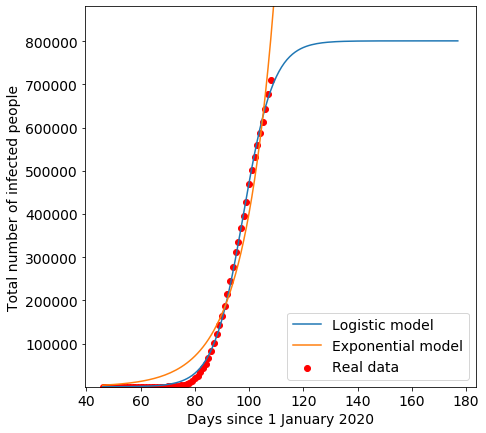

5.61
The peak day was 2020-04-07
Number of infections at end: 800877 +/- 12080
End date is 2020-06-26


In [1]:
# Adapted from https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d
# by Gianluca Malato

import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('USA.csv')
FMT = '%Y-%m-%d'
date = df['DATE']

df['DATE'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2019-12-31", FMT)).days  )

#a = infection speed
#b = day of maximum infections
#c = total number of infections at end
# -> is found with the Fit function

def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

x = list(df.iloc[:,0])
y = list(df.iloc[:,1])

fit = curve_fit(logistic_model,x,y,p0=[2,100,200000])

#Standard errors fround with Errors function
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]

# fit, errors
(a,b,c)=(fit[0][0],fit[0][1],fit[0][2])

# Predicted end date with Sol function
sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))

def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,1], maxfev=5000)

pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Real data",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )
# Predicted exponential curve
plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
plt.legend()
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c*1.1))
plt.show()

newlist = fit[0]

a= round(newlist[0],2)
peak = int(round(newlist[1]))
atend=int(round(newlist[2]))

standard_error_endnumber = int(round(errors[2]))


s='2019-12-31'
date = datetime.strptime(s, "%Y-%m-%d")
peak_day = date + timedelta(days=peak)
end_day = date + timedelta(days=sol)

peak_date=datetime.strftime(peak_day, "%Y-%m-%d")
end_date=datetime.strftime(end_day, "%Y-%m-%d")

print(a)
print("The peak day was", peak_date)
print("Number of infections at end:", atend, "+/-", standard_error_endnumber)


print("End date is", end_date)